In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
repre = pd.read_csv(f'{Project}/Results/Tables/conversion_tables/representative-isoforms.txt', sep='\t', usecols=[0,1], header=None, names=['gene_id','transcript_id'])
display(repre)

full_name = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/chip/Mouse_Ensembl_Gene_ID_MSigDB.v2022.1.Mm.chip', sep='\t')
full_name = full_name.rename(columns={'Probe Set ID':'gene_id', 'Gene Symbol':'gene_name', 'Gene Title':'full_name'})
full_name['full_name'] = full_name['full_name'].str.split('[').str[0]

display(full_name)

,gene_id,transcript_id
0,ENSMUSG00000000001.5,ENSMUST00000000001.5
1,ENSMUSG00000000003.16,ENSMUST00000000003.14
2,ENSMUSG00000000028.16,ENSMUST00000000028.14
3,ENSMUSG00000000031.17,ENSMUST00000136359.8
4,ENSMUSG00000000037.18,ENSMUST00000019101.11
...,...,...
55354,ENSMUSG00002076988.1,ENSMUST00020182589.1
55355,ENSMUSG00002076989.1,ENSMUST00000083836.4
55356,ENSMUSG00002076990.1,ENSMUST00020183326.1
55357,ENSMUSG00002076991.1,ENSMUST00020182837.1


,gene_id,gene_name,full_name
0,ENSMUSG00000000001,Gnai3,guanine nucleotide binding protein (G protein)...
1,ENSMUSG00000000003,Pbsn,probasin
2,ENSMUSG00000000028,Cdc45,cell division cycle 45
3,ENSMUSG00000000031,H19,"H19, imprinted maternally expressed transcript"
4,ENSMUSG00000000037,Scml2,Scm polycomb group protein like 2
...,...,...,...
43242,ENSMUSG00002076818,SNORD14,Small nucleolar RNA SNORD14
43243,ENSMUSG00002076971,Snord100,"small nucleolar RNA, C/D box 100"
43244,ENSMUSG00002076975,Gm23823,"predicted gene, 23823"
43245,ENSMUSG00002076989,Gm23510,"predicted gene, 23510"


In [3]:
RNA_logFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
RNA_logFC['gene_id'] = RNA_logFC['gene_id'].str.split('.').str[0]

# RD_logFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RD_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
# RD_logFC['gene_id'] = RD_logFC['gene_id'].str.split('.').str[0]

PT_logFC = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_avg_log2FC.tsv', sep='\t')
PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id')).drop_duplicates(subset='gene_id')
PT_logFC = pd.merge(PT_conv, PT_logFC, on='uniprot_id').drop(columns='uniprot_id')

FC = pd.merge(RNA_logFC, PT_logFC, on='gene_id', how='outer')
display(FC)

,gene_id,R4,R8,PT4,PT8
0,ENSMUSG00000033845,1.919982,2.397623,0.982792,0.996227
1,ENSMUSG00000025903,0.564052,0.894128,0.264329,0.694292
2,ENSMUSG00000033813,-0.823592,0.210519,-0.398329,-0.477997
3,ENSMUSG00000033793,0.192070,-0.043765,0.570325,0.779236
4,ENSMUSG00000025907,-0.130110,0.328257,-0.263798,-0.044767
...,...,...,...,...,...
12294,ENSMUSG00000072625,NaN,NaN,0.138865,0.090268
12295,ENSMUSG00000073435,NaN,NaN,0.807195,1.304159
12296,ENSMUSG00000051149,NaN,NaN,0.037458,-0.274277
12297,ENSMUSG00000024391,NaN,NaN,-0.298645,0.166079


In [4]:
stalling_change_all = pd.read_csv(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stalling-change_FEresult.tsv', sep='\t')
display(stalling_change_all)

stalling_estimated_genes = stalling_change_all[['transcript_id']].drop_duplicates()
stalling_estimated_genes = pd.merge(repre, stalling_estimated_genes, on='transcript_id')
stalling_estimated_genes['gene_id'] = stalling_estimated_genes['gene_id'].str.split('.').str[0]
display(stalling_estimated_genes)

,transcript_id,reltostart-asite,D4_OR,D4_p,D4_FDR,D8_OR,D8_p,D8_FDR
0,ENSMUST00000000001.5,33,0.308259,0.356685,1.0,0.774119,1.000000,1.0
1,ENSMUST00000000001.5,36,0.926156,1.000000,1.0,1.161905,1.000000,1.0
2,ENSMUST00000000001.5,39,0.000000,0.231122,1.0,1.744579,0.667567,1.0
3,ENSMUST00000000001.5,42,inf,0.500555,1.0,NaN,1.000000,1.0
4,ENSMUST00000000001.5,45,0.462733,0.611056,1.0,0.580519,1.000000,1.0
...,...,...,...,...,...,...,...,...
2238001,ENSMUST00000239525.1,10461,0.000000,1.000000,1.0,0.000000,1.000000,1.0
2238002,ENSMUST00000239525.1,10464,1.561936,1.000000,1.0,0.000000,1.000000,1.0
2238003,ENSMUST00000239525.1,10467,0.520467,0.494876,1.0,0.000000,0.598884,1.0
2238004,ENSMUST00000239525.1,10470,0.669209,0.749590,1.0,0.767953,1.000000,1.0


,gene_id,transcript_id
0,ENSMUSG00000000001,ENSMUST00000000001.5
1,ENSMUSG00000000056,ENSMUST00000103015.4
2,ENSMUSG00000000078,ENSMUST00000000080.8
3,ENSMUSG00000000088,ENSMUST00000000090.8
4,ENSMUSG00000000127,ENSMUST00000000129.14
...,...,...
5019,ENSMUSG00000118491,ENSMUST00000142247.8
5020,ENSMUSG00000118552,ENSMUST00000238938.2
5021,ENSMUSG00000118653,ENSMUST00000239472.2
5022,ENSMUSG00000118664,ENSMUST00000239509.1


In [5]:
stalling_change = pd.read_csv(f'{Project}/Results/Tables/Ribosome_stalling/v20230730/adi_stalling-change_FEresult_sig.tsv', sep='\t')
stalling_change = pd.merge(repre, stalling_change, on='transcript_id', how='right').sort_values('D8_FDR')
# stalling_change = stalling_change[stalling_change['aa-asite']=='E']
stalling_change = stalling_change[stalling_change['D8_FDR']<0.01]
stalling_change = stalling_change[stalling_change['D8_OR']>1]
# stalling_change['D8_log2OR'] = np.log2(stalling_change['D8_OR'])
stalling_change['gene_id'] = stalling_change['gene_id'].str.split('.').str[0]

display(stalling_change)

,gene_id,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D4_OR,D4_p,D4_FDR,D8_OR,D8_p,D8_FDR
23191,ENSMUSG00000026043,ENSMUST00000087883.13,3312,3102,GAA,E,1.803037,9.700806e-139,4.669321e-136,2.950872,0.000000,0.000000
1275,ENSMUSG00000001506,ENSMUST00000001547.8,1684,1539,GAA,E,1.458798,2.121448e-122,3.040035e-120,2.563152,0.000000,0.000000
1985,ENSMUSG00000001506,ENSMUST00000001547.8,4396,4251,UAC,Y,2.043079,4.208669e-79,3.547660e-77,5.968501,0.000000,0.000000
22993,ENSMUSG00000026043,ENSMUST00000087883.13,2547,2337,GAA,E,1.955971,1.695743e-96,3.060816e-94,4.260758,0.000000,0.000000
917,ENSMUSG00000001506,ENSMUST00000001547.8,226,81,GAA,E,3.045111,1.525542e-234,5.465254e-232,10.141205,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2208,ENSMUSG00000002957,ENSMUST00000003038.12,1159,972,UUG,L,2.130350,1.072801e-03,4.924158e-01,2.600783,0.000022,0.009951
13798,ENSMUSG00000031812,ENSMUST00000034270.17,368,204,CGG,R,2.531474,3.353894e-05,3.521589e-03,2.332870,0.000190,0.009973
22000,ENSMUSG00000055447,ENSMUST00000084838.14,1060,918,UAU,Y,3.201099,1.253081e-02,9.441867e-01,4.961735,0.000099,0.009985
24671,ENSMUSG00000022665,ENSMUST00000099498.10,2418,1752,AAA,K,1.258972,4.041560e-01,1.000000e+00,2.641265,0.000161,0.009993


In [6]:
codon_data = pd.read_csv(f'{Project}/Results/Tables/Codon_analysis/codon_usage/v20220503/gene-level_codon_usage.tsv', sep='\t')
codon_data = codon_data.rename(columns={'Transcript_ID':'transcript_id', 'Gene_ID':'gene_id', 'Gene_name':'gene_name'})
codon_data['Total_codon_num'] = codon_data.iloc[:,5:].sum(axis=1)
codon_data = pd.merge(repre, codon_data, on=['transcript_id','gene_id'])

for codon in codon_data.iloc[:,5:-1]:
    codon_data[codon] = codon_data[codon] / codon_data['Total_codon_num'] * 100

# display(codon_data)

codontab = {
    'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
    'TTC': 'F', 'TTT': 'F',
    'TTA': 'L', 'TTG': 'L', 'CTA': 'L', 'CTC': 'L', 'CTG': 'L','CTT': 'L',
    'TAC': 'Y', 'TAT': 'Y',
    # 'TAA': '*', 'TAG': '*', 'TGA': '*',
    'TGC': 'C', 'TGT': 'C',
    'TGG': 'W',
    'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
    'CAC': 'H', 'CAT': 'H',
    'CAA': 'Q', 'CAG': 'Q',
    'CGA': 'R', 'CGC': 'R', 'CGG': 'R','CGT': 'R', 'AGA': 'R', 'AGG': 'R',
    'ATA': 'I', 'ATC': 'I', 'ATT': 'I',
    'ATG': 'M',
    'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
    'AAC': 'N', 'AAT': 'N',
    'AAA': 'K', 'AAG': 'K',
    'AGC': 'S', 'AGT': 'S',
    'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
    'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
    'GAC': 'D', 'GAT': 'D',
    'GAA': 'E', 'GAG': 'E',
    'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G'
}

AAs = []
codons = []
for codon, AA in codontab.items():
    AAs.append(AA)
    codons.append(codon.replace('T','U'))

AA_codon = pd.DataFrame({'AA':AAs, 'codon':codons})
AA2codon = AA_codon.groupby('AA')['codon'].apply(list).to_dict()
# display(AA2codon)

AA_ratio_data = codon_data[['transcript_id','gene_id','gene_name','Total_codon_num']].copy()
for AA in AA2codon:
    AA_ratio_data[AA] = codon_data[AA2codon[AA]].sum(axis=1)

AA_ratio_data['gene_id'] = AA_ratio_data['gene_id'].str.split('.').str[0]
display(AA_ratio_data)

AA_ratio_data_BG = pd.merge(stalling_estimated_genes[['gene_id']], AA_ratio_data, on='gene_id')
display(AA_ratio_data_BG)

,transcript_id,gene_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,M,N,P,Q,R,S,T,V,W,Y
0,ENSMUST00000000001.5,ENSMUSG00000000001,Gnai3,355,6.760563,2.816901,7.042254,8.450704,4.788732,5.352113,...,2.253521,3.943662,0.845070,3.661972,5.633803,6.197183,6.478873,6.197183,0.845070,4.225352
1,ENSMUST00000000003.14,ENSMUSG00000000003,Pbsn,175,3.428571,2.285714,2.285714,7.428571,4.000000,5.714286,...,5.142857,5.714286,2.285714,4.000000,5.714286,4.000000,4.571429,7.428571,0.571429,5.142857
2,ENSMUST00000000028.14,ENSMUSG00000000028,Cdc45,567,5.467372,1.940035,7.760141,7.231041,5.467372,3.527337,...,2.821869,3.350970,2.469136,4.938272,5.291005,8.465608,5.114638,7.054674,1.410935,3.350970
3,ENSMUST00000019101.11,ENSMUSG00000000037,Scml2,906,7.395143,1.545254,6.512141,5.849890,4.304636,8.057395,...,0.883002,2.649007,8.830022,4.194260,6.622517,7.174393,8.498896,5.077263,1.766004,0.662252
4,ENSMUST00000000049.6,ENSMUSG00000000049,Apoh,346,5.491329,6.647399,3.468208,5.780347,5.491329,6.358382,...,2.023121,3.757225,9.826590,1.734104,4.046243,5.780347,6.936416,6.069364,1.445087,4.046243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21929,ENSMUST00000239545.1,ENSMUSG00000118670,Muc19,7525,19.933555,1.794020,1.235880,2.923588,0.611296,9.581395,...,0.225914,2.019934,5.940199,1.116279,2.232558,22.019934,22.325581,2.790698,0.199336,0.823920
21930,ENSMUST00000239552.1,ENSMUSG00000118671,Eppk1,3459,7.950275,0.896213,5.174906,7.776814,2.428448,8.123735,...,1.850246,1.618965,4.394334,6.620411,6.909511,6.042209,6.909511,7.805724,0.780572,2.515178
21931,ENSMUST00000239554.1,ENSMUSG00000118672,Muc4,3991,4.535204,1.202706,2.630920,3.081934,1.929341,4.585317,...,2.129792,3.583062,6.740165,6.940616,3.257329,18.892508,20.370834,3.958908,0.676522,1.353044
21932,ENSMUST00010126032.3,ENSMUSG00001074846,Iqcf3,204,8.823529,1.960784,5.392157,16.176471,0.490196,2.450980,...,0.980392,4.411765,3.431373,8.823529,6.372549,4.901961,5.392157,3.921569,2.450980,0.490196


,gene_id,transcript_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,M,N,P,Q,R,S,T,V,W,Y
0,ENSMUSG00000000001,ENSMUST00000000001.5,Gnai3,355,6.760563,2.816901,7.042254,8.450704,4.788732,5.352113,...,2.253521,3.943662,0.845070,3.661972,5.633803,6.197183,6.478873,6.197183,0.845070,4.225352
1,ENSMUSG00000000056,ENSMUST00000103015.4,Narf,463,6.911447,3.455724,5.615551,8.207343,3.887689,6.047516,...,1.295896,2.375810,3.887689,5.615551,5.183585,7.775378,4.751620,7.775378,0.647948,2.807775
2,ENSMUSG00000000078,ENSMUST00000000080.8,Klf6,319,3.134796,4.075235,5.642633,8.150470,4.075235,5.956113,...,0.940439,2.821317,7.210031,2.821317,6.269592,15.673981,5.015674,3.761755,1.567398,2.194357
3,ENSMUSG00000000088,ENSMUST00000000090.8,Cox5a,147,14.285714,2.721088,6.122449,7.482993,2.040816,4.761905,...,0.680272,2.721088,6.802721,0.680272,7.482993,4.761905,4.081633,6.122449,1.360544,3.401361
4,ENSMUSG00000000127,ENSMUST00000000129.14,Fer,824,4.854369,1.456311,4.611650,9.466019,2.791262,4.733010,...,2.912621,4.126214,3.155340,6.796117,3.762136,6.432039,4.975728,6.432039,1.092233,3.276699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,ENSMUSG00000118491,ENSMUST00000142247.8,Gm44505,530,9.056604,2.830189,4.905660,11.320755,1.320755,5.471698,...,0.943396,1.698113,8.301887,3.962264,8.867925,8.113208,4.716981,3.396226,0.377358,2.075472
5013,ENSMUSG00000118552,ENSMUST00000238938.2,Rplp2-ps1,116,17.241379,0.000000,8.620690,8.620690,1.724138,11.206897,...,0.862069,3.448276,4.310345,0.862069,1.724138,10.344828,0.000000,6.896552,0.000000,1.724138
5014,ENSMUSG00000118653,ENSMUST00000239472.2,RP23-180C14.7,224,9.821429,1.339286,4.464286,8.035714,2.232143,8.482143,...,1.339286,4.464286,7.589286,0.892857,5.357143,4.910714,5.357143,4.464286,0.446429,2.232143
5015,ENSMUSG00000118664,ENSMUST00000239509.1,Tusc3,349,7.736390,1.719198,3.151862,3.438395,6.590258,6.876791,...,3.438395,4.871060,4.297994,4.871060,7.736390,7.449857,3.151862,5.730659,1.432665,3.724928


In [7]:
AA_ratio_data_BG_FC = pd.merge(AA_ratio_data_BG, FC, on='gene_id', how='left')
display(AA_ratio_data_BG_FC)

,gene_id,transcript_id,gene_name,Total_codon_num,A,C,D,E,F,G,...,R,S,T,V,W,Y,R4,R8,PT4,PT8
0,ENSMUSG00000000001,ENSMUST00000000001.5,Gnai3,355,6.760563,2.816901,7.042254,8.450704,4.788732,5.352113,...,5.633803,6.197183,6.478873,6.197183,0.845070,4.225352,-0.982948,-1.023048,-0.382196,-0.625774
1,ENSMUSG00000000056,ENSMUST00000103015.4,Narf,463,6.911447,3.455724,5.615551,8.207343,3.887689,6.047516,...,5.183585,7.775378,4.751620,7.775378,0.647948,2.807775,1.186888,1.282568,0.256920,0.735677
2,ENSMUSG00000000078,ENSMUST00000000080.8,Klf6,319,3.134796,4.075235,5.642633,8.150470,4.075235,5.956113,...,6.269592,15.673981,5.015674,3.761755,1.567398,2.194357,-1.115713,-1.088835,NaN,NaN
3,ENSMUSG00000000088,ENSMUST00000000090.8,Cox5a,147,14.285714,2.721088,6.122449,7.482993,2.040816,4.761905,...,7.482993,4.761905,4.081633,6.122449,1.360544,3.401361,2.407410,2.986577,1.054011,1.653756
4,ENSMUSG00000000127,ENSMUST00000000129.14,Fer,824,4.854369,1.456311,4.611650,9.466019,2.791262,4.733010,...,3.762136,6.432039,4.975728,6.432039,1.092233,3.276699,-1.326498,-0.244820,-0.408658,-0.000596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5012,ENSMUSG00000118491,ENSMUST00000142247.8,Gm44505,530,9.056604,2.830189,4.905660,11.320755,1.320755,5.471698,...,8.867925,8.113208,4.716981,3.396226,0.377358,2.075472,NaN,NaN,NaN,NaN
5013,ENSMUSG00000118552,ENSMUST00000238938.2,Rplp2-ps1,116,17.241379,0.000000,8.620690,8.620690,1.724138,11.206897,...,1.724138,10.344828,0.000000,6.896552,0.000000,1.724138,NaN,NaN,NaN,NaN
5014,ENSMUSG00000118653,ENSMUST00000239472.2,RP23-180C14.7,224,9.821429,1.339286,4.464286,8.035714,2.232143,8.482143,...,5.357143,4.910714,5.357143,4.464286,0.446429,2.232143,NaN,NaN,NaN,NaN
5015,ENSMUSG00000118664,ENSMUST00000239509.1,Tusc3,349,7.736390,1.719198,3.151862,3.438395,6.590258,6.876791,...,7.736390,7.449857,3.151862,5.730659,1.432665,3.724928,-0.141956,-0.760043,0.508747,0.604285


In [8]:
stall_num_AA_rank = list(stalling_change.groupby('aa-asite').size().reset_index(name='stall_num')[1:].sort_values('stall_num', ascending=False)['aa-asite'])

----

In [9]:
stabl = pd.read_csv(f'{Project}/Results/Tables/Intron_RNA_change/REMBRANDTS/out/v20230815/stability.filtered.mx.txt', sep='\t').rename(columns={'GeneID':'gene_id'})
# display(stabl)

stabl['D0'] = stabl[['D0a','D0b','D0c']].mean(axis=1)
for SP in [Day+rep for Day in ['D0','D4','D8'] for rep in ['a','b','c']]:
    stabl[SP] = stabl[SP] - stabl['D0']
stabl = stabl.drop(columns='D0')
# display(stabl)

avg_stabl = stabl[['gene_id']].copy()
for Day in ['D0','D4','D8']:
    avg_stabl[Day] = stabl[[Day+rep for rep in ['a','b','c']]].mean(axis=1)
avg_stabl = avg_stabl[['gene_id','D4','D8']].rename(columns={'D4':'S4', 'D8':'S8'})
display(avg_stabl)

,gene_id,S4,S8
0,ENSMUSG00000000058,0.288815,0.912689
1,ENSMUSG00000000088,-0.229405,0.344774
2,ENSMUSG00000000131,-0.188012,-0.242323
3,ENSMUSG00000000134,-0.125844,-0.209755
4,ENSMUSG00000000148,-0.192310,-0.475821
...,...,...,...
4638,ENSMUSG00000118346,0.418344,0.606414
4639,ENSMUSG00000121301,-0.349892,-0.462991
4640,ENSMUSG00000121493,0.186162,0.011664
4641,ENSMUSG00000121504,-0.533011,-0.266911


In [10]:
intron = pd.read_csv(f'{Project}/Results/Tables/Intron_RNA_change/REMBRANDTS/out/v20230815/intronic.filtered.mx.txt', sep='\t').rename(columns={'GeneID':'gene_id'})
# display(intron)

intron['D0'] = intron[['D0a.intron','D0b.intron','D0c.intron']].mean(axis=1)
for SP in [Day+rep+'.intron' for Day in ['D0','D4','D8'] for rep in ['a','b','c']]:
    intron[SP] = intron[SP] - intron['D0']
intron = intron.drop(columns='D0')
# display(intron)

avg_intron = intron[['gene_id']].copy()
for Day in ['D0','D4','D8']:
    avg_intron[Day] = intron[[Day+rep+'.intron' for rep in ['a','b','c']]].mean(axis=1)
avg_intron = avg_intron[['gene_id','D4','D8']].rename(columns={'D4':'I4', 'D8':'I8'})
# avg_intron = pd.merge(full_name, avg_intron, on='gene_id', how='right')
# display(avg_intron)


exon = pd.read_csv(f'{Project}/Results/Tables/Intron_RNA_change/REMBRANDTS/out/v20230815/exonic.filtered.mx.txt', sep='\t').rename(columns={'GeneID':'gene_id'})
# display(intron)

exon['D0'] = exon[['D0a.exon','D0b.exon','D0c.exon']].mean(axis=1)
for SP in [Day+rep+'.exon' for Day in ['D0','D4','D8'] for rep in ['a','b','c']]:
    exon[SP] = exon[SP] - exon['D0']
exon = exon.drop(columns='D0')
# display(intron)

avg_exon = exon[['gene_id']].copy()
for Day in ['D0','D4','D8']:
    avg_exon[Day] = exon[[Day+rep+'.exon' for rep in ['a','b','c']]].mean(axis=1)
avg_exon = avg_exon[['gene_id','D4','D8']].rename(columns={'D4':'E4', 'D8':'E8'})
# avg_exon = pd.merge(full_name, avg_exon, on='gene_id', how='right')
# display(avg_exon)

stabl_data = pd.merge(avg_stabl, avg_intron, on='gene_id')
stabl_data = pd.merge(stabl_data, avg_exon, on='gene_id')
stabl_data['E-I4'] = stabl_data['E4'] - stabl_data['I4']
stabl_data['E-I8'] = stabl_data['E8'] - stabl_data['I8']
display(stabl_data)

,gene_id,S4,S8,I4,I8,E4,E8,E-I4,E-I8
0,ENSMUSG00000000058,0.288815,0.912689,3.383915,2.508260,3.587516,3.357786,0.203601,0.849526
1,ENSMUSG00000000088,-0.229405,0.344774,2.147007,2.223730,2.465785,3.136275,0.318777,0.912546
2,ENSMUSG00000000131,-0.188012,-0.242323,-0.154365,-0.640556,-0.244527,-0.476839,-0.090162,0.163717
3,ENSMUSG00000000134,-0.125844,-0.209755,-0.967996,-1.744480,-0.391196,-0.687962,0.576799,1.056518
4,ENSMUSG00000000148,-0.192310,-0.475821,-0.526666,0.076203,-0.045560,-0.497055,0.481106,-0.573258
...,...,...,...,...,...,...,...,...,...
4638,ENSMUSG00000118346,0.418344,0.606414,0.406457,0.506902,0.478531,0.681474,0.072074,0.174573
4639,ENSMUSG00000121301,-0.349892,-0.462991,-0.344763,-2.246243,-0.394490,-0.753565,-0.049728,1.492678
4640,ENSMUSG00000121493,0.186162,0.011664,-0.668292,0.161444,0.205742,0.006934,0.874034,-0.154510
4641,ENSMUSG00000121504,-0.533011,-0.266911,0.574433,1.091518,-0.898379,-0.961172,-1.472812,-2.052691


-----------
Performed EnrichR analysis

/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte/Results/Tables/EnrichR/v20230810/EnrichR.ipynb

In [11]:
# used_GMT = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/gmt/v20221025/m5.go.v2022.1.Mm.symbols.level3to5.gmt'
used_GMT = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/gmt/m5.go.v2023.1.Mm.symbols.gmt'

import csv

gmt = {}
rf = open(used_GMT)
reader = csv.reader(rf, delimiter='\t')
for line in reader:
    gmt[line[0]] = line[2:]
rf.close()

In [12]:
conv = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/chip/Mouse_Ensembl_Gene_ID_MSigDB.v2022.1.Mm.chip', sep='\t')
conv = conv.drop(columns='Gene Title').rename(columns={'Probe Set ID':'gene_id', 'Gene Symbol':'external_gene_name'})
display(conv)

# display(AA_ratio_data_BG_FC)
conv_BG = pd.merge(AA_ratio_data_BG_FC[['gene_id']], conv, on='gene_id')
display(conv_BG)

,gene_id,external_gene_name
0,ENSMUSG00000000001,Gnai3
1,ENSMUSG00000000003,Pbsn
2,ENSMUSG00000000028,Cdc45
3,ENSMUSG00000000031,H19
4,ENSMUSG00000000037,Scml2
...,...,...
43242,ENSMUSG00002076818,SNORD14
43243,ENSMUSG00002076971,Snord100
43244,ENSMUSG00002076975,Gm23823
43245,ENSMUSG00002076989,Gm23510


,gene_id,external_gene_name
0,ENSMUSG00000000001,Gnai3
1,ENSMUSG00000000056,Narf
2,ENSMUSG00000000078,Klf6
3,ENSMUSG00000000088,Cox5a
4,ENSMUSG00000000127,Fer
...,...,...
4970,ENSMUSG00000118491,Gm44505
4971,ENSMUSG00000118552,Rplp2-ps1
4972,ENSMUSG00000118653,Gm2296
4973,ENSMUSG00000118664,Tusc3


In [13]:
gmt_dfs = {}
for GS in gmt:
    tmp = pd.merge(conv_BG, pd.DataFrame({'external_gene_name':gmt[GS]}), on='external_gene_name')
    if len(tmp) < 10: continue
    gmt_dfs[GS] = tmp

display(gmt_dfs)
display(len(gmt_dfs.keys()))

{'GOBP_MITOCHONDRIAL_GENOME_MAINTENANCE':                gene_id external_gene_name
 0   ENSMUSG00000004069             Dnaja3
 1   ENSMUSG00000022889             Mrpl39
 2   ENSMUSG00000026496              Parp1
 3   ENSMUSG00000028893              Sesn2
 4   ENSMUSG00000029911              Ssbp1
 5   ENSMUSG00000030314               Atg7
 6   ENSMUSG00000030879             Mrpl17
 7   ENSMUSG00000030978               Rrm1
 8   ENSMUSG00000032633               Flcn
 9   ENSMUSG00000033845             Mrpl15
 10  ENSMUSG00000038084               Opa1
 11  ENSMUSG00000059552              Trp53
 12  ENSMUSG00000107283              Mpv17,
 'GOBP_REPRODUCTION':                 gene_id external_gene_name
 0    ENSMUSG00000000326               Comt
 1    ENSMUSG00000000561              Wdr77
 2    ENSMUSG00000000751               Rpa1
 3    ENSMUSG00000000753           Serpinf1
 4    ENSMUSG00000000787              Ddx3x
 ..                  ...                ...
 307  ENSMUSG00000075706   

3953

In [14]:
AA_stalled_genes = {}
for AA in stall_num_AA_rank:
    AA_stalled_genes[AA] = stalling_change[stalling_change['aa-asite']==AA][['gene_id']].drop_duplicates()

In [15]:
GS_list = []
stalled_pct = []
avgPTlogFC = []
avgPTlogFC_all = []
avgRlogFC_all = []
avgDeltaS_all = []
sizes = []
for GS in gmt_dfs:
    tmp = gmt_dfs[GS]
    tmp = pd.merge(tmp, AA_stalled_genes['E'], on='gene_id', how='left', indicator=True)
    tmp = pd.merge(tmp, FC, on='gene_id', how='left')
    tmp = pd.merge(tmp, stabl_data[['gene_id','S8']], on='gene_id', how='left')

    GS_list.append(GS)
    stalled_pct.append(len(tmp[tmp['_merge']=='both'])/len(tmp)*100)
    avgPTlogFC.append(tmp[tmp['R8'].abs()<0.3]['PT8'].mean())
    avgPTlogFC_all.append(tmp['PT8'].mean())
    avgRlogFC_all.append(tmp['R8'].mean())
    avgDeltaS_all.append(tmp['S8'].mean())
    sizes.append(len(tmp))

GMT_stall_impact = pd.DataFrame({'Geneset':GS_list, 
                                 'Stalled %':stalled_pct, 
                                 'Avg PT8 logFC, lowRNAch':avgPTlogFC, 
                                 'Avg PT8 logFC':avgPTlogFC_all, 
                                 'Avg R8 logFC':avgRlogFC_all, 
                                 'Avg delta S8':avgDeltaS_all, 
                                 'Geneset_size':sizes})
display(GMT_stall_impact)

,Geneset,Stalled %,"Avg PT8 logFC, lowRNAch",Avg PT8 logFC,Avg R8 logFC,Avg delta S8,Geneset_size
0,GOBP_MITOCHONDRIAL_GENOME_MAINTENANCE,23.076923,0.508556,1.028436,0.614211,0.179631,13
1,GOBP_REPRODUCTION,44.871795,-0.111175,-0.122470,-0.216829,-0.090249,312
2,GOBP_REGULATION_OF_DNA_RECOMBINATION,26.190476,0.250987,-0.067842,-0.087154,-0.065592,42
3,GOBP_RIBOSOMAL_LARGE_SUBUNIT_ASSEMBLY,27.777778,-0.206731,0.016309,0.045903,-0.003450,18
4,GOBP_RIBOSOMAL_SMALL_SUBUNIT_ASSEMBLY,40.000000,0.000033,0.120690,0.162491,-0.009786,15
...,...,...,...,...,...,...,...
3948,GOMF_PHOSPHATIDYLINOSITOL_BISPHOSPHATE_BINDING,44.117647,-0.354473,-0.402223,-0.172740,0.067896,34
3949,GOMF_UBIQUITIN_SPECIFIC_PROTEASE_BINDING,46.666667,-0.430336,0.179979,0.304401,0.262161,15
3950,GOMF_U1_SNRNP_BINDING,50.000000,-0.141654,-0.111953,0.052437,-0.043469,10
3951,GOMF_PROTEIN_TYROSINE_KINASE_BINDING,43.478261,-0.001300,-0.155119,-0.389988,-0.316227,46


In [16]:
# GS_interest1 = ['GOCC_U2_TYPE_SPLICEOSOMAL_COMPLEX', 'GOMF_CYTOSKELETAL_PROTEIN_BINDING', 'GOCC_NUCLEAR_SPECK', 'GOBP_CHROMATIN_ORGANIZATION', 'GOCC_CHROMOSOME', 'GOBP_CYTOSKELETON_ORGANIZATION', 'GOCC_SMALL_NUCLEAR_RIBONUCLEOPROTEIN_COMPLEX', 'GOCC_SPLICEOSOMAL_COMPLEX', 'GOBP_CHROMATIN_REMODELING', 'GOMF_HISTONE_BINDING', 'GOMF_ACTIN_BINDING', 'GOCC_CENTROSOME', 'GOCC_SPINDLE', 'GOBP_NEGATIVE_REGULATION_OF_PROTEIN_FOLDING', 'GOCC_POLYMERIC_CYTOSKELETAL_FIBER', 'GOCC_SUPRAMOLECULAR_POLYMER', 'GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION', 'GOBP_SUPRAMOLECULAR_FIBER_ORGANIZATION', 'GOBP_MICROTUBULE_ORGANIZING_CENTER_ORGANIZATION', 'GOCC_CHROMOSOME_CENTROMERIC_REGION']
# GS_interest2 = ['GOCC_SUPRAMOLECULAR_POLYMER', 'GOMF_CYTOSKELETAL_PROTEIN_BINDING', 'GOBP_CYTOSKELETON_ORGANIZATION', 'GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION', 'GOCC_POLYMERIC_CYTOSKELETAL_FIBER', 'GOCC_CENTROSOME', 'GOBP_ORGANELLE_ASSEMBLY', 'GOCC_CILIUM', 'GOCC_CHROMOSOME', 'GOMF_TUBULIN_BINDING', 'GOMF_ACTIN_BINDING', 'GOBP_SPERMATID_DIFFERENTIATION', 'GOBP_CILIUM_ORGANIZATION', 'GOBP_MICROTUBULE_BASED_MOVEMENT', 'GOBP_SUPRAMOLECULAR_FIBER_ORGANIZATION', 'GOMF_MICROTUBULE_BINDING', 'GOCC_SPLICEOSOMAL_COMPLEX', 'GOCC_MYOSIN_II_COMPLEX', 'GOCC_CONTRACTILE_FIBER', 'GOCC_CENTRIOLE']
# GS_interest1 = ['GOCC_U2_TYPE_SPLICEOSOMAL_COMPLEX', 'GOCC_NUCLEAR_SPECK', 'GOBP_CHROMATIN_ORGANIZATION', 'GOCC_CHROMOSOME', 'GOBP_CYTOSKELETON_ORGANIZATION', 'GOCC_SMALL_NUCLEAR_RIBONUCLEOPROTEIN_COMPLEX', 'GOCC_SPLICEOSOMAL_COMPLEX', 'GOBP_CHROMATIN_REMODELING', 'GOMF_HISTONE_BINDING', 'GOMF_ACTIN_BINDING', 'GOCC_CENTROSOME', 'GOCC_SPINDLE', 'GOBP_NEGATIVE_REGULATION_OF_PROTEIN_FOLDING', 'GOCC_POLYMERIC_CYTOSKELETAL_FIBER', 'GOCC_SUPRAMOLECULAR_POLYMER', 'GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION', 'GOBP_SUPRAMOLECULAR_FIBER_ORGANIZATION', 'GOBP_MICROTUBULE_ORGANIZING_CENTER_ORGANIZATION', 'GOCC_CHROMOSOME_CENTROMERIC_REGION']
# GS_interest2 = ['GOCC_SUPRAMOLECULAR_POLYMER', 'GOBP_CYTOSKELETON_ORGANIZATION', 'GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION', 'GOCC_POLYMERIC_CYTOSKELETAL_FIBER', 'GOCC_CENTROSOME', 'GOBP_ORGANELLE_ASSEMBLY', 'GOCC_CILIUM', 'GOCC_CHROMOSOME', 'GOBP_SPERMATID_DIFFERENTIATION', 'GOBP_CILIUM_ORGANIZATION', 'GOBP_MICROTUBULE_BASED_MOVEMENT', 'GOBP_SUPRAMOLECULAR_FIBER_ORGANIZATION', 'GOCC_SPLICEOSOMAL_COMPLEX', 'GOCC_MYOSIN_II_COMPLEX', 'GOCC_CONTRACTILE_FIBER', 'GOCC_CENTRIOLE']

# GS_interest1 = GS_interest1[:10]
# GS_interest2 = GS_interest2[:10]

# plot_data1 = pd.merge(GMT_stall_impact, pd.DataFrame({'Geneset':GS_interest1}), on='Geneset', how='left', indicator=True)
# plot_data1 = plot_data1.rename(columns={'_merge':'mark'}).replace('both',1).replace('left_only',0)
# # display(plot_data1)

# plot_data2 = pd.merge(GMT_stall_impact, pd.DataFrame({'Geneset':GS_interest2}), on='Geneset', how='left', indicator=True)
# plot_data2 = plot_data2.rename(columns={'_merge':'mark'}).replace('both',1).replace('left_only',0)
# # display(plot_data2)

plot_data3 = GMT_stall_impact.copy()
plot_data3['mark'] = 0
plot_data3.loc[plot_data3['Geneset'].str.contains('ACTIN_'), 'mark'] = 1
# display(plot_data3.sort_values('mark'))

plot_data4 = GMT_stall_impact.copy()
plot_data4['mark'] = 0
plot_data4.loc[plot_data4['Geneset'].str.contains('MICROTUBUL'), 'mark'] = 1
# display(plot_data4.sort_values('mark'))

plot_data5 = GMT_stall_impact.copy()
plot_data5['mark'] = 0
plot_data5.loc[plot_data5['Geneset'].str.contains('CILIUM') | plot_data5['Geneset'].str.contains('CILIA'), 'mark'] = 1
# display(plot_data5.sort_values('mark')[-20:])

plot_data6 = GMT_stall_impact.copy()
plot_data6['mark'] = 0
plot_data6.loc[plot_data6['Geneset'].str.contains('CYTOSKELET'), 'mark'] = 1
# display(plot_data6.sort_values('mark')[-30:])

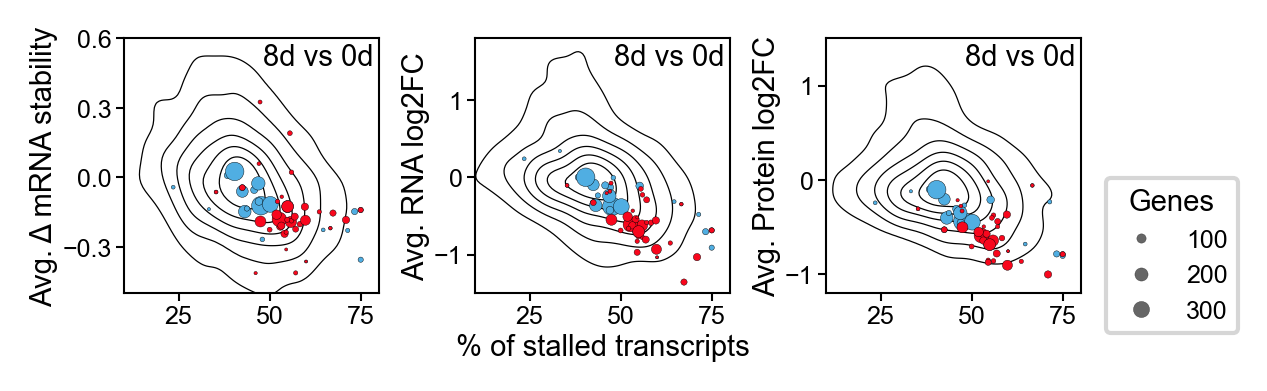

In [29]:
dot_sF = 0.05

sF = 1 # Size factor
wgap = 0.32
hgap = 0.1
nrow, ncol = 1, 3

width_ratios = [0.85, 0.85, 0.85]
height_ratios = [0.85]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
for yval in ['Avg delta S8','Avg R8 logFC','Avg PT8 logFC']:

    ax = fig.add_subplot(grid[row,col])

    # Main
    sns.kdeplot(data = plot_data3,
                x = 'Stalled %', y = yval,
                color='#000000', linewidths=0.3,
                levels=7, thresh=.15)
    
    plot_data = plot_data6
    sct1 = ax.scatter(plot_data[plot_data['mark']==1]['Stalled %'],
                    plot_data[plot_data['mark']==1][yval],
                    s=plot_data[plot_data['mark']==1]['Geneset_size']*dot_sF, c='#50AEE2',
                    lw=0.1, edgecolors='k', zorder=3, label='Cytoskeleton')
    
    plot_data = plot_data3
    sct2 = ax.scatter(plot_data[plot_data['mark']==1]['Stalled %'],
                    plot_data[plot_data['mark']==1][yval],
                    s=plot_data[plot_data['mark']==1]['Geneset_size']*dot_sF, c='#F8071D',
                    lw=0.1, edgecolors='k', zorder=3, label='Actin')
    ax.text(0.98, 0.98, '8d vs 0d', transform=ax.transAxes, ha='right', va='top', fontsize=7)

    ax.set_xlim(10,80)
    ax.tick_params(length=2, width=0.5, pad=1, direction='out')

    if yval == 'Avg delta S8' : 
        ax.set_ylim(-0.5, 0.6)
        ax.set_yticks([-0.3, 0, 0.3, 0.6])
        ax.set_ylabel('Avg. \u0394 mRNA stability', labelpad=1)
        ax.set_xlabel('')
    if yval == 'Avg R8 logFC' : 
        ax.set_ylim(-1.5, 1.8)
        ax.set_yticks([-1, 0, 1])
        ax.set_ylabel('Avg. RNA log2FC', labelpad=1)
        ax.set_xlabel('% of stalled transcripts', labelpad=1)
    if yval == 'Avg PT8 logFC' : 
        ax.set_ylim(-1.2, 1.5)
        ax.set_yticks([-1, 0 ,1])
        ax.set_ylabel('Avg. Protein log2FC', labelpad=1)
        ax.set_xlabel('')        

        handles, labels = sct1.legend_elements(prop="sizes", alpha=0.6, num=4)
        labels = [int(int(''.join(i for i in x if i.isdigit())) / dot_sF) for x in labels]
        ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(1.05, 0.5), ncol=1, title="Genes")

    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)


    col+=1

plt.savefig('Effect_of_stalling_8d.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [18]:
display(plot_data6[plot_data6['mark']==1].sort_values('Geneset_size', ascending=False))

,Geneset,Stalled %,"Avg PT8 logFC, lowRNAch",Avg PT8 logFC,Avg R8 logFC,Avg delta S8,Geneset_size,mark
452,GOBP_CYTOSKELETON_ORGANIZATION,47.607053,-0.236010,-0.438107,-0.373657,-0.121959,397,1
3150,GOCC_MICROTUBULE_CYTOSKELETON,40.404040,-0.188443,-0.102647,0.002229,0.025759,396,1
3571,GOMF_CYTOSKELETAL_PROTEIN_BINDING,50.173010,-0.164274,-0.446288,-0.377521,-0.116148,289,1
3419,GOCC_POLYMERIC_CYTOSKELETAL_FIBER,46.889952,-0.254342,-0.348797,-0.239466,-0.025660,209,1
2093,GOBP_REGULATION_OF_CYTOSKELETON_ORGANIZATION,43.169399,-0.255715,-0.401562,-0.361176,-0.147391,183,1
3149,GOCC_ACTIN_CYTOSKELETON,54.938272,-0.348831,-0.684138,-0.700715,-0.125375,162,1
16,GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION,42.500000,-0.258928,-0.203456,-0.095468,-0.060503,160,1
2094,GOBP_POSITIVE_REGULATION_OF_CYTOSKELETON_ORGAN...,47.058824,-0.195411,-0.454167,-0.424321,-0.103919,68,1
1025,GOBP_CYTOSKELETON_DEPENDENT_INTRACELLULAR_TRAN...,55.223881,-0.215327,-0.209347,-0.109525,-0.134083,67,1
2786,GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION_INV...,45.762712,-0.224676,-0.306082,-0.102714,-0.053998,59,1


---

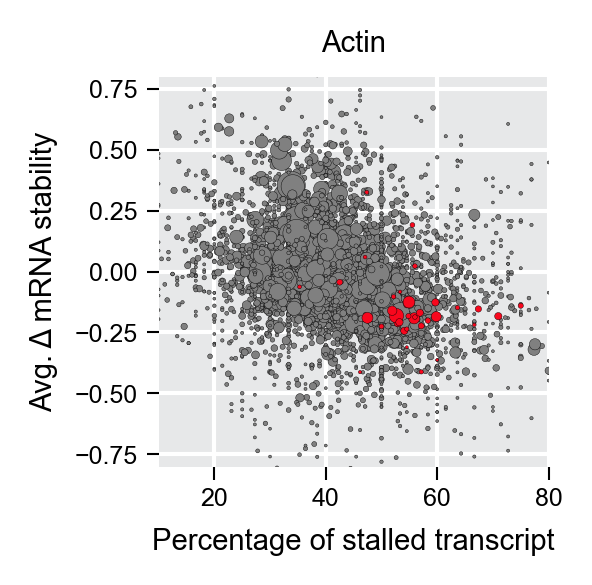

,Geneset,Stalled %,"Avg PT8 logFC, lowRNAch",Avg PT8 logFC,Avg R8 logFC,Avg delta S8,Geneset_size,mark
2962,GOBP_REGULATION_OF_ACTIN_CYTOSKELETON_REORGANI...,35.294118,-0.415901,-0.305039,-0.103156,-0.063002,17,1
1097,GOBP_ACTIN_CYTOSKELETON_REORGANIZATION,42.500000,-0.402545,-0.526431,-0.326070,-0.043909,40,1
1135,GOBP_NEGATIVE_REGULATION_OF_ACTIN_FILAMENT_BUN...,46.153846,0.704672,-0.214186,-0.203254,-0.412756,13,1
1282,GOBP_REGULATION_OF_ARP2_3_COMPLEX_MEDIATED_ACT...,47.058824,-0.372423,-0.275943,-0.180089,0.059241,17,1
2025,GOBP_REGULATION_OF_ACTIN_NUCLEATION,47.368421,-0.372423,-0.328210,-0.073243,0.325287,19,1
1214,GOBP_REGULATION_OF_ACTIN_FILAMENT_BASED_PROCESS,47.482014,-0.263518,-0.500811,-0.548202,-0.190113,139,1
1030,GOBP_NEGATIVE_REGULATION_OF_ACTIN_FILAMENT_POL...,50.000000,-0.536288,-0.703921,-0.686612,-0.225387,28,1
2621,GOBP_REGULATION_OF_ACTIN_FILAMENT_ORGANIZATION,51.923077,-0.280781,-0.550375,-0.507542,-0.160763,104,1
2325,GOBP_ACTIN_MEDIATED_CELL_CONTRACTION,52.173913,-1.079250,-0.577848,-0.659101,-0.103621,23,1
970,GOBP_ACTIN_FILAMENT_BASED_PROCESS,52.674897,-0.275829,-0.588636,-0.609758,-0.181215,243,1


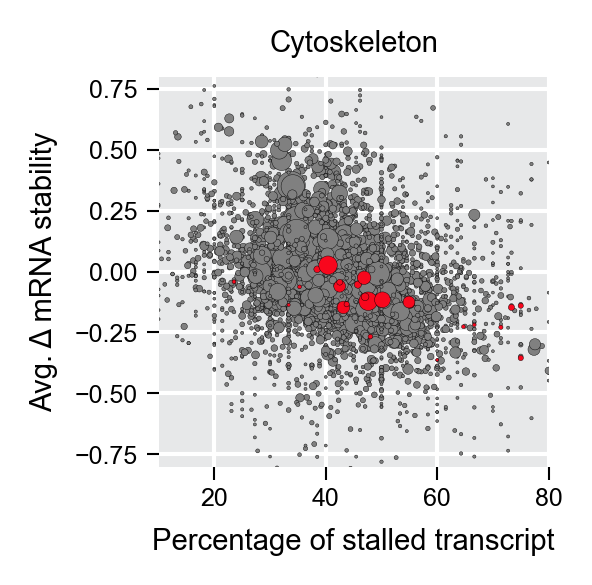

,Geneset,Stalled %,"Avg PT8 logFC, lowRNAch",Avg PT8 logFC,Avg R8 logFC,Avg delta S8,Geneset_size,mark
1605,GOBP_PROTEIN_LOCALIZATION_TO_CYTOSKELETON,23.529412,-0.146139,-0.241353,0.241382,-0.042142,17,1
2609,GOBP_SYNAPTIC_VESICLE_CYTOSKELETAL_TRANSPORT,33.333333,-0.236096,-0.119803,0.342025,-0.136836,12,1
2962,GOBP_REGULATION_OF_ACTIN_CYTOSKELETON_REORGANI...,35.294118,-0.415901,-0.305039,-0.103156,-0.063002,17,1
2337,GOBP_REGULATION_OF_MICROTUBULE_CYTOSKELETON_OR...,38.461538,-0.220677,-0.098483,0.001889,0.009095,52,1
3150,GOCC_MICROTUBULE_CYTOSKELETON,40.404040,-0.188443,-0.102647,0.002229,0.025759,396,1
16,GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION,42.500000,-0.258928,-0.203456,-0.095468,-0.060503,160,1
1097,GOBP_ACTIN_CYTOSKELETON_REORGANIZATION,42.500000,-0.402545,-0.526431,-0.326070,-0.043909,40,1
2093,GOBP_REGULATION_OF_CYTOSKELETON_ORGANIZATION,43.169399,-0.255715,-0.401562,-0.361176,-0.147391,183,1
3329,GOCC_INTERMEDIATE_FILAMENT_CYTOSKELETON,43.750000,-0.015340,-0.349243,-0.233177,-0.134218,32,1
2786,GOBP_MICROTUBULE_CYTOSKELETON_ORGANIZATION_INV...,45.762712,-0.224676,-0.306082,-0.102714,-0.053998,59,1


In [19]:
for plot_data,title in zip([plot_data3, plot_data6],['Actin','Cytoskeleton']):
    # plot_data = plot_data2.copy()
    dot_sF = 0.05

    sF = 1.3 # Size factor
    wgap = 0.2
    hgap = 0.1
    nrow, ncol = 1, 2

    fs_w = ncol*sF + (ncol-1)*wgap*sF
    fs_h = nrow*sF + (nrow-1)*hgap*sF

    #
    fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
    grid = plt.GridSpec(nrow, ncol,
                        left=0, right=1, bottom=0, top=1,
                        wspace=wgap, hspace=hgap)

    row = 0
    col = 0
        
    ax = fig.add_subplot(grid[row,col])

    # Main
    # sns.kdeplot(data = plot_data[plot_data['mark']==0],
    #             x = 'Stalled %', y = 'Avg PT8 logFC, lowRNAch',
    #             c='#808080', linewidths=0.5)
    ax.scatter(plot_data[plot_data['mark']==0]['Stalled %'],
                plot_data[plot_data['mark']==0]['Avg delta S8'],
                s=plot_data[plot_data['mark']==0]['Geneset_size']*dot_sF, c='#808080',
                lw=0.1, edgecolors='k')
    ax.scatter(plot_data[plot_data['mark']==1]['Stalled %'],
                plot_data[plot_data['mark']==1]['Avg delta S8'],
                s=plot_data[plot_data['mark']==1]['Geneset_size']*dot_sF, c='#F8071D',
                lw=0.1, edgecolors='k', zorder=3)

    ax.set_xlim(10,80)
    ax.set_ylim(-0.8, 0.8)
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.tick_params(length=3, width=0.5, pad=2)

    ax.set_xlabel('Percentage of stalled transcript')
    ax.set_ylabel('Avg. \u0394 mRNA stability')
    ax.set_title(title)

    ax.set_facecolor('#E7E8E9')
    ax.grid(linestyle='-', c='#FFFFFF', lw=1)
    # ax.grid(linestyle='-', c='#000000', lw=0.3)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # plt.savefig('Stall-pct_avgPTlogFC-lowRch_Glu-rich2-top10_plot.pdf', bbox_inches='tight')
    plt.show()
    plt.close()

    display(plot_data[plot_data['mark']==1].sort_values('Stalled %'))